# Module 03

## Session 10 Time Series Forecasting

# Univariate Time Series Forcasting

Analyze data shampoo sales.csv
* identififed data pattternbuild ACF PACF plot until second differencing
* identified the most suitable model based on ACF PACF plot
* build ARIMA(2,1,0) model
* forecast for 6 periods ahead

# Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data

In [2]:
df_shampoo = pd.read_csv('./datasets/shampo sales.csv')
df_shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


# EDA

<AxesSubplot:xlabel='Month', ylabel='Sales'>

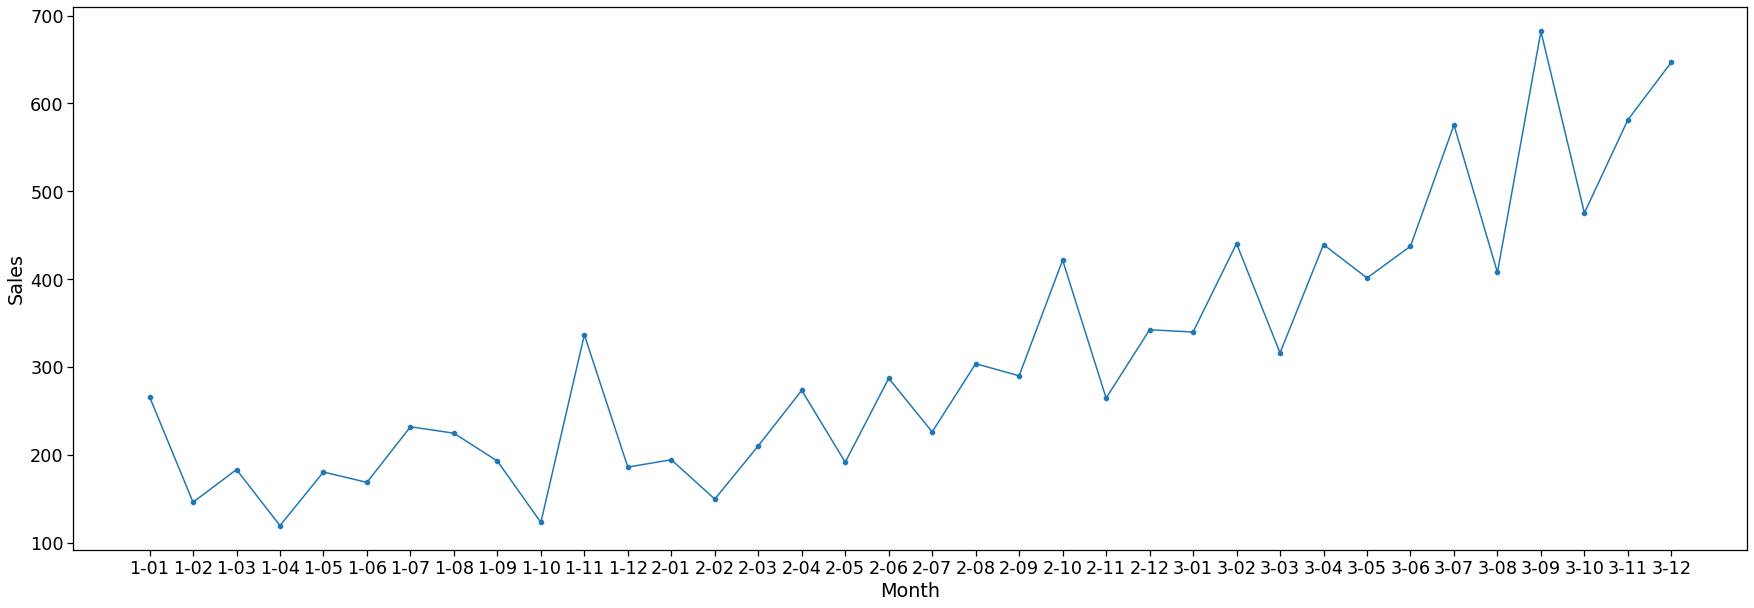

In [3]:
plt.figure(figsize=(30,10))

sns.set_context(context='notebook', font_scale=1.6)

sns.scatterplot(x='Month', y='Sales', data=df_shampoo)
sns.lineplot(x='Month', y='Sales', data=df_shampoo)

# ACF - PACF

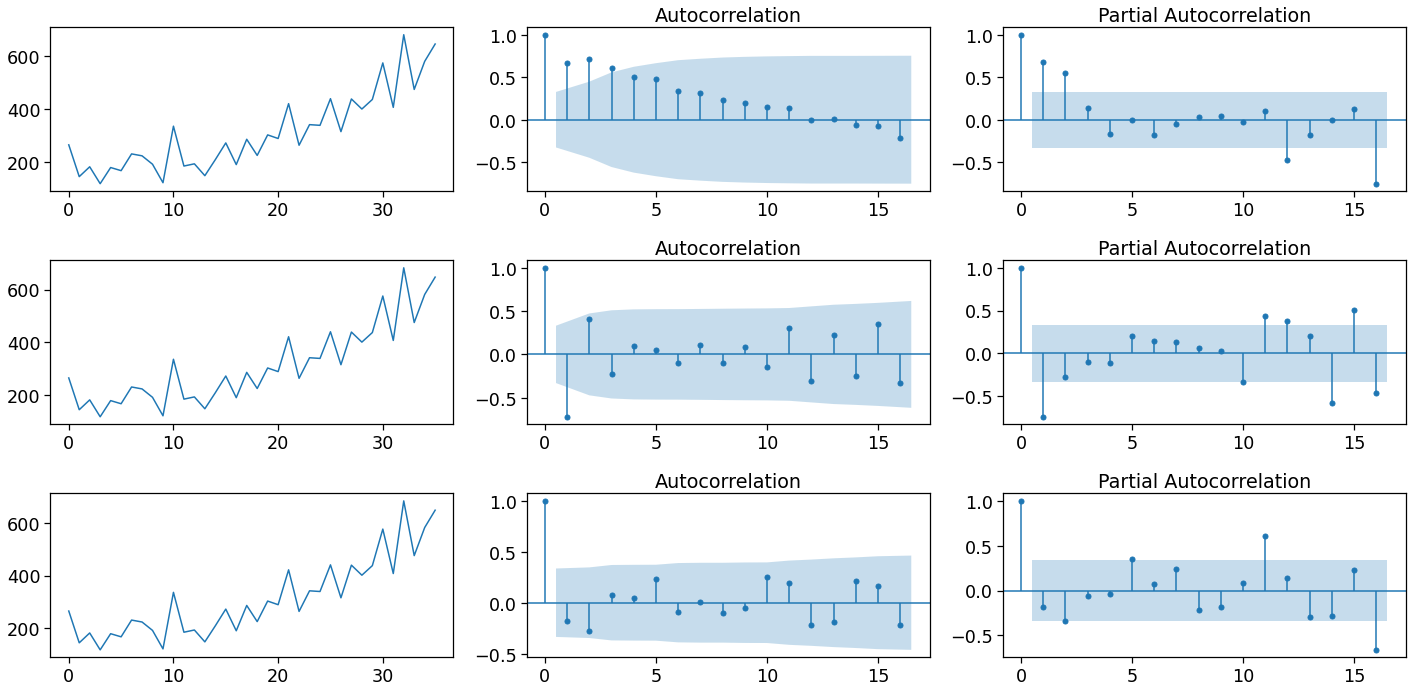

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(20,10))

# original data
axes[0, 0].plot(df_shampoo['Sales'])
plot_acf(df_shampoo['Sales'], ax=axes[0, 1])
plot_pacf(df_shampoo['Sales'], ax=axes[0, 2])

# data first diff
axes[1, 0].plot(df_shampoo['Sales'])
plot_acf(df_shampoo['Sales'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df_shampoo['Sales'].diff().dropna(), ax=axes[1, 2])

# data second diff
axes[2, 0].plot(df_shampoo['Sales'])
plot_acf(df_shampoo['Sales'].diff(2).dropna(), ax=axes[2, 1])
plot_pacf(df_shampoo['Sales'].diff(2).dropna(), ax=axes[2, 2])

plt.tight_layout()
plt.show()

Check stationary of the model:
* if stationary: use model
* if not: use differencing

from graph above:
* stationary in first diff
* ACF-PACF:
    - ACF cut off leg 2
    - PACF cut off leg 2

So, model candidate:
* ARIMA(2,1,0)
* ARIMA(0,1,2)

# Modeling

In [5]:
model = ARIMA(df_shampoo['Sales'], order=(2,1,0))
model_fit = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65240D+00    |proj g|=  7.00080D-03

At iterate    5    f=  5.65199D+00    |proj g|=  5.33440D-03

At iterate   10    f=  5.65182D+00    |proj g|=  3.37508D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   0.000D+00   5.652D+00
  F =   5.6518223445228291     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


In [6]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -197.814
Method:                       css-mle   S.D. of innovations             67.833
Date:                Mon, 16 Aug 2021   AIC                            403.628
Time:                        08:31:46   BIC                            409.849
Sample:                             1   HQIC                           405.775
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6504      4.907      2.374      0.018       2.034      21.267
ar.L1.D.Sales    -1.0223      0.167     -6.109      0.000      -1.350      -0.694
ar.L2.D.Sales    -0.3655      0.167     

# Forecasting

In [7]:
forecast_length = 6
forecast_result = model_fit.forecast(forecast_length)

In [8]:
print('prediction result: \n', forecast_result[0])

prediction result: 
 [568.90819491 652.48157952 623.37086751 650.40195236 661.22802686
 668.09901012]


In [9]:
print('standard error: \n', forecast_result[1])

standard error: 
 [67.83250489 67.84940704 81.18744865 84.32960312 88.92625551 94.05873057]


In [10]:
print('confidence interval: \n', forecast_result[1])

confidence interval: 
 [67.83250489 67.84940704 81.18744865 84.32960312 88.92625551 94.05873057]


In [11]:
month = []

for i in range(1, forecast_length+1):
    month.append('4-'+str(i))

In [12]:
df_forecast = pd.DataFrame(
    {
        'Month': month,
        'Sales':forecast_result[0]
    }
)
df_forecast

,Month,Sales
0,4-1,568.908195
1,4-2,652.481580
2,4-3,623.370868
3,4-4,650.401952
4,4-5,661.228027
5,4-6,668.099010


In [13]:
df_forecast = df_shampoo[-1:].append(df_forecast)

In [14]:
df_forecast2 = pd.DataFrame(
    {
        'Month':month,
        'Sales':forecast_result[0],
        'se':forecast_result[1],
        'upper':forecast_result[2][:,0],
        'lower':forecast_result[2][:,1]
    }
)
df_forecast2

,Month,Sales,se,upper,lower
0,4-1,568.908195,67.832505,435.958928,701.857461
1,4-2,652.481580,67.849407,519.499185,785.463974
2,4-3,623.370868,81.187449,464.246392,782.495343
3,4-4,650.401952,84.329603,485.118967,815.684937
4,4-5,661.228027,88.926256,486.935769,835.520285
5,4-6,668.099010,94.058731,483.747286,852.450734


In [16]:
fig = go.Figure([go.Scatter(name='true', x=df_shampoo['Month'], y=df_shampoo['Sales'])])
fig.add_trace(go.Scatter(go.Scatter(name='forecast', x=df_forecast['Month'], y=df_forecast['Sales'])))
fig.add_trace(go.Scatter(go.Scatter(name='lower', x=df_forecast2['Month'], y=df_forecast2['lower'])))
fig.add_trace(go.Scatter(go.Scatter(name='upper', x=df_forecast2['Month'], y=df_forecast2['upper'])))

fig.update_xaxes(rangeslider_visible=True)
fig.show()